# Librerias

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Dataframes

In [2]:
df = pd.read_csv("data.csv")

Veamos como esta conformado el dataframe, cuantas filas tiene y columnas.

In [3]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


Del Dataframe podemos ver que algunas columnas tienen valores de 0 a 4 o 5 en algunos casos, como ser en la columna `view` o `condition`. La columna `view` se codifica con valores numéricos que representan diferentes niveles de calidad de la vista, por ejemplo:

- 0: Sin vista o mala vista
- 1: Vista parcial o ligeramente obstruida
- 2: Vista promedio
- 3: Buena vista
- 4: Excelente vista

Y la columna `condition` está codificada numéricamente para representar diferentes niveles de condición de la propiedad, con valores que pueden variar según el conjunto de datos específico. Aquí hay una interpretación común de los valores:

- 1: Muy pobre (propiedad en mal estado, necesita muchas reparaciones)
- 2: Pobre (propiedad en mal estado, necesita reparaciones)
- 3: Promedio (propiedad en condiciones aceptables, sin problemas graves)
- 4: Buena (propiedad en buen estado, bien mantenida)
- 5: Excelente (propiedad en excelente estado, recién renovada o muy bien mantenida)

# EDA

Voy hacer un análisis exploratorio de los datos para ver como se conforman, si hay ausentes, los tipos de datos, etc.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Lo primero que veo es que la columna `date` esta como object en vez de date64. Se me ocurre que podria crear una columna en donde me indicque la casa se renovo o no, como para desglosar las columnas de `yr_build` y `yr_renovated`. También a la columna `price` se ve con notación cientifica por lo que dificulta leer correctamente el precio de la propiedad para ello voy a utilizar el método `pd.set_option` para configurar la visualización de floats en el DataFrame.

In [5]:
# Convertir la columna 'date' a tipo datetime64
df['date'] = pd.to_datetime(df['date'])

# Verificar el cambio
print(df.dtypes)

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object


In [6]:
# Configurar la visualización globalmente
pd.set_option('display.float_format', '{:.2f}'.format)

# Ahora muestra el DataFrame sin notación científica
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.00,3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.00,5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.00,3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.00,3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.00,4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166.67,3.00,1.75,1510,6360,1.00,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,534333.33,3.00,2.50,1460,7573,2.00,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,416904.17,3.00,2.50,3010,7014,2.00,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,203400.00,4.00,2.00,2090,6630,1.00,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [7]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Veo que no hay valores nulos, lo cual ayuda ahorrar tiempo.

In [8]:
df.duplicated().sum()

0

Tampoco hay filas con valores duplicados.

Veamos ahora los estadisticos

In [9]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,2014-06-07 03:14:42.782608640,551962.99,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
min,2014-05-02 00:00:00,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,2014-05-21 00:00:00,322875.00,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,2014-06-09 00:00:00,460943.46,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,2014-06-24 00:00:00,654962.50,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,2014-07-10 00:00:00,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00
std,NaN,563834.70,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41


Cuando vemos detalladamente los números vemos algunas cosas interesantes, como que hay propiedades con valor **0**, o sin dormitorios o sin baños. Es por ello que voy a eliminar estas filas porque me van a dar problemas al crear los modelos de machine learning, haciendo que el entrenamiento no sea el correcto.

In [10]:
# Eliminación de filas con valor 0 en 'price', 'bedrooms' o 'bathrooms'
df_cleaned = df[(df['price'] != 0) & (df['bedrooms'] != 0) & (df['bathrooms'] != 0)]

# Verificar el DataFrame limpio
print("\nDataFrame limpio:")
df_cleaned.describe()


DataFrame limpio:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4549,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00,4549.00
mean,2014-06-07 03:52:20.998021632,557625.65,3.40,2.16,2131.58,14834.60,1.51,0.01,0.23,3.45,1821.29,310.29,1970.79,808.04
min,2014-05-02 00:00:00,7800.00,1.00,0.75,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,2014-05-21 00:00:00,326100.00,3.00,1.75,1460.00,5000.00,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,2014-06-09 00:00:00,465000.00,3.00,2.25,1970.00,7680.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,2014-06-24 00:00:00,657500.00,4.00,2.50,2610.00,10970.00,2.00,0.00,0.00,4.00,2300.00,600.00,1997.00,1999.00
max,2014-07-10 00:00:00,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00
std,NaN,563891.45,0.90,0.78,955.23,35971.14,0.54,0.08,0.77,0.68,853.29,462.04,29.76,979.31


No fueron muchas las filas que se eliminaron porque pasamos de 4600 filas a 4549, esto no va afectar en nada a la hora de hacer el entrenamiento de los modelos de machine learning.

Voy a crear una columna que se llame `renovated` que me indique si la casa fue renovada o no, para tener otra formar de entrenar a los modelos.

In [11]:
# Crear la nueva columna 'renovated'
df_cleaned['renovated'] = df_cleaned['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Mostrar las primeras filas del dataframe para verificar la nueva columna
df_cleaned[['yr_renovated', 'renovated']].head()

,yr_renovated,renovated
0,2005,1
1,0,0
2,0,0
3,0,0
4,1992,1


## Visualizaciones

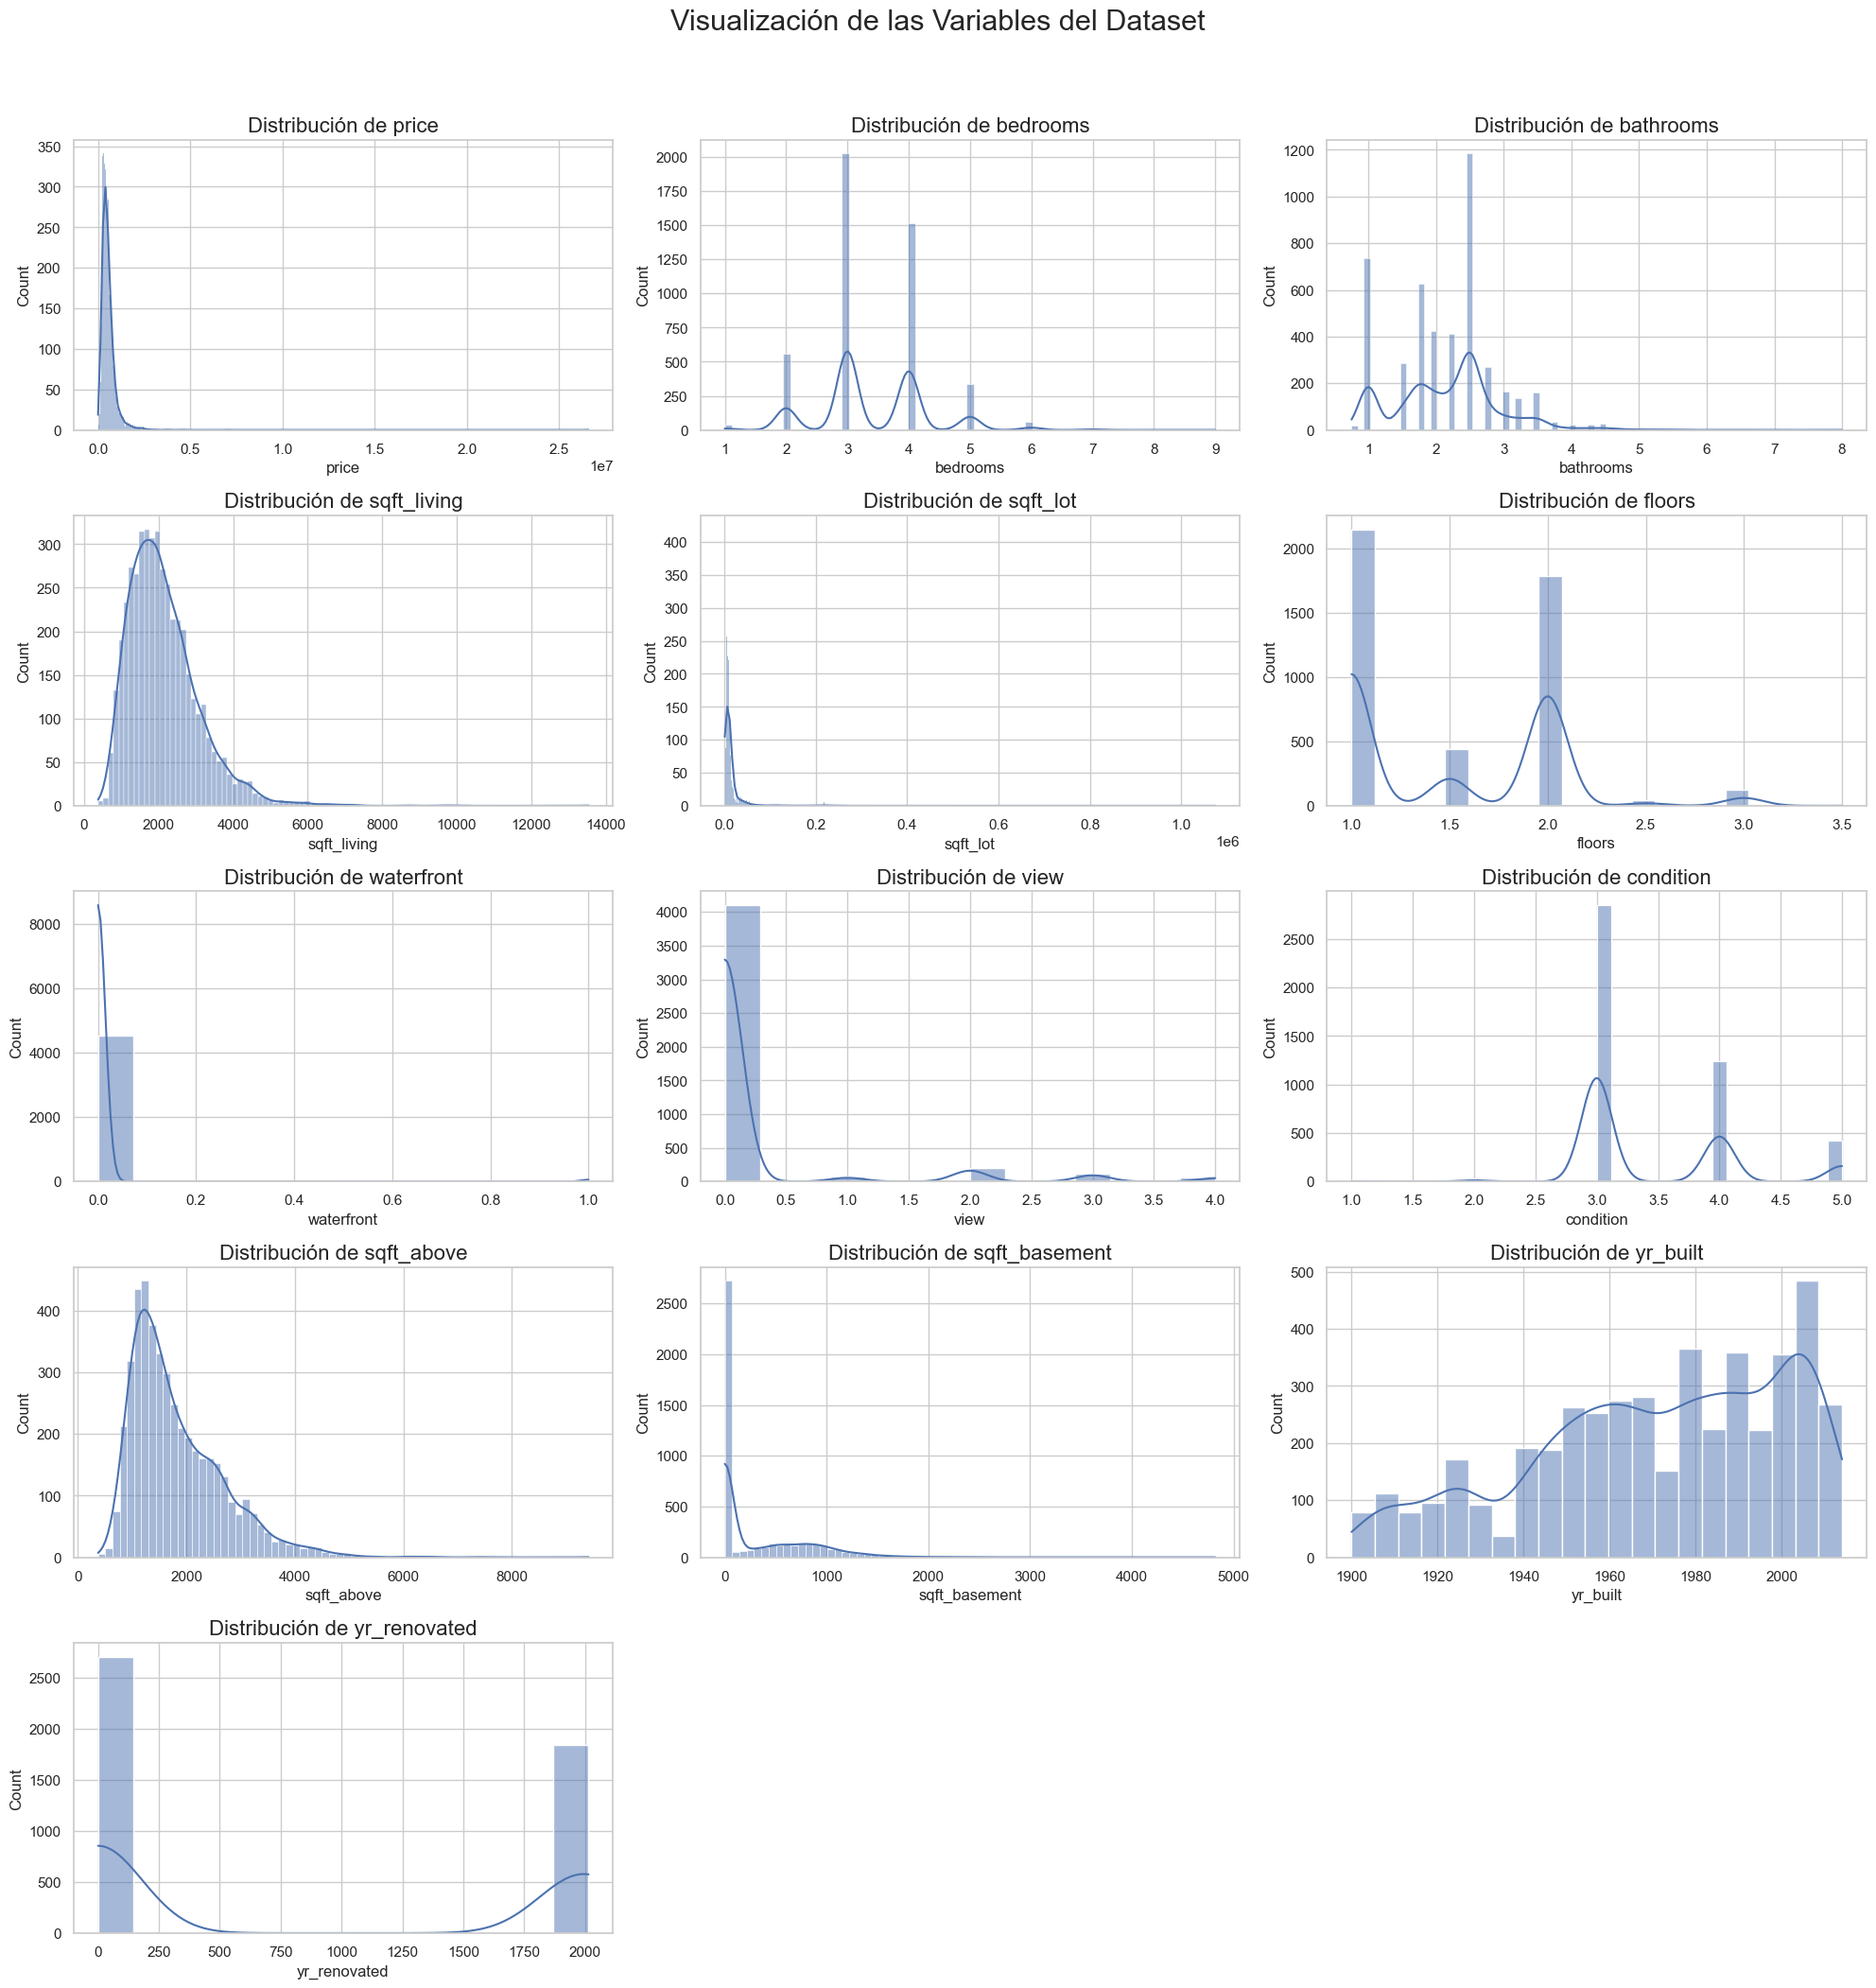

In [12]:
# Configure Seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a figure for all plots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 25))
fig.suptitle('Visualización de las Variables del Dataset', fontsize=22)

# List of columns to plot
columns_to_plot = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                   'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.histplot(df_cleaned[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}', fontsize=16)

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

De los gráficos podemos ver que:
- La mayoria de los precios se hubican entre los 7800 y 460.00 dolares
- La mayoria de las casas cuentan con 3 o 4
   dormitorios.
- El promedio de baños es de 2 a 3.
- El promedio de tamaño de los living es de 2000 pies cuadrados.
- El del los lotes es de 14.000 pies cuadrados.
- La cantidad de pisos van desde 1 a 3.
- La mayoria de las casas no tiene vista al agua.
- Las propiedades tiene por lo general vistas malas o sin vistas.
- Las condiciones de las propiedades en su mayoria son de propiedad en condiciones aceptables, sin problemas graves.
- Los pies cuadrados construidos en yo mayoria son de 100 a 5000 y los de los sotanos es de 10 a 1500.
- Exiten casas que son del año 1900 hasta 2014.
- La mayoria de las casas no fueron renovadas.

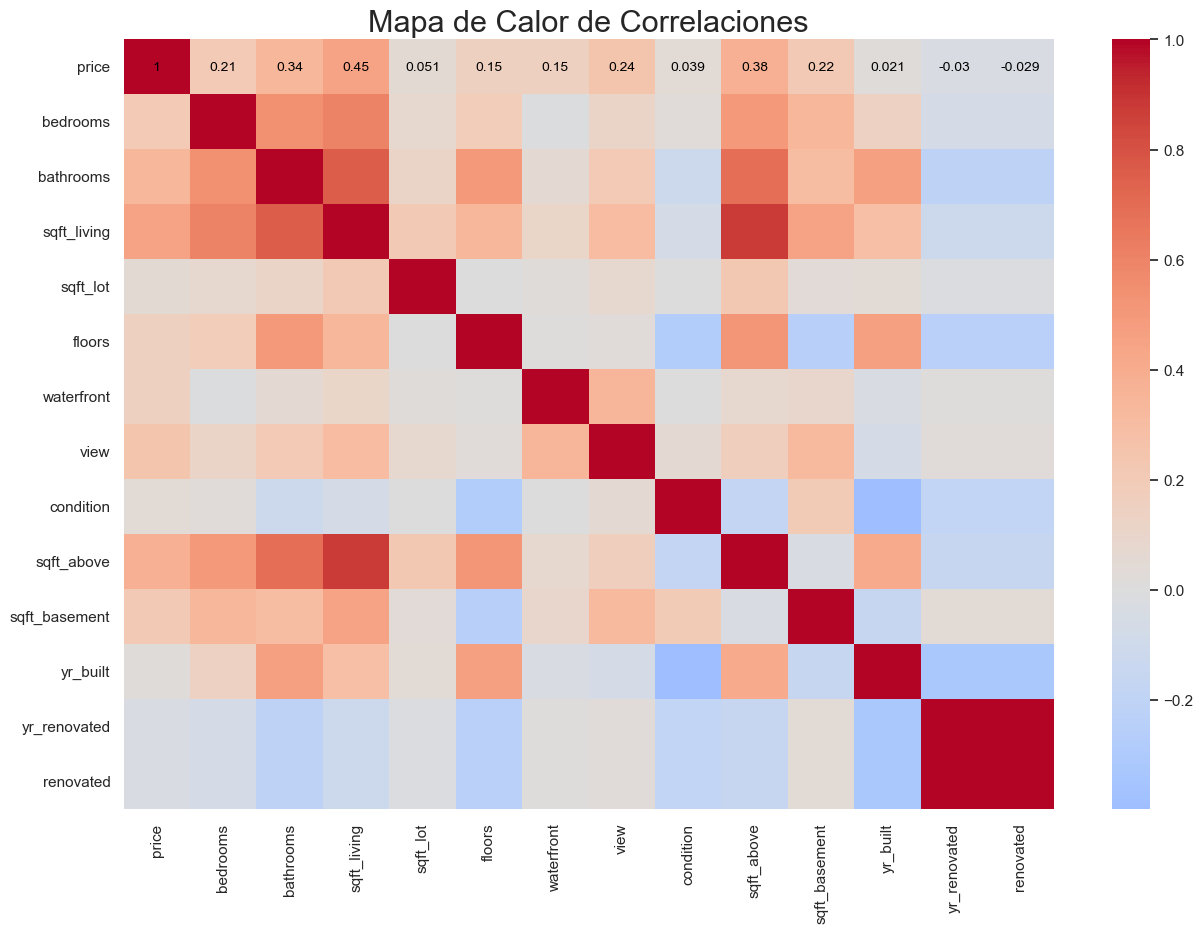

In [24]:
# Seleccionar solo las columnas numéricas
numeric_data = df_cleaned.select_dtypes(include=['number'])

# Crear el mapa de calor de correlaciones
plt.figure(figsize=(15, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 10, "color": "black"})
plt.title('Mapa de Calor de Correlaciones', fontsize=22)
plt.show()

Voy a ver como se distribuyen las propiedades según su ubicación 

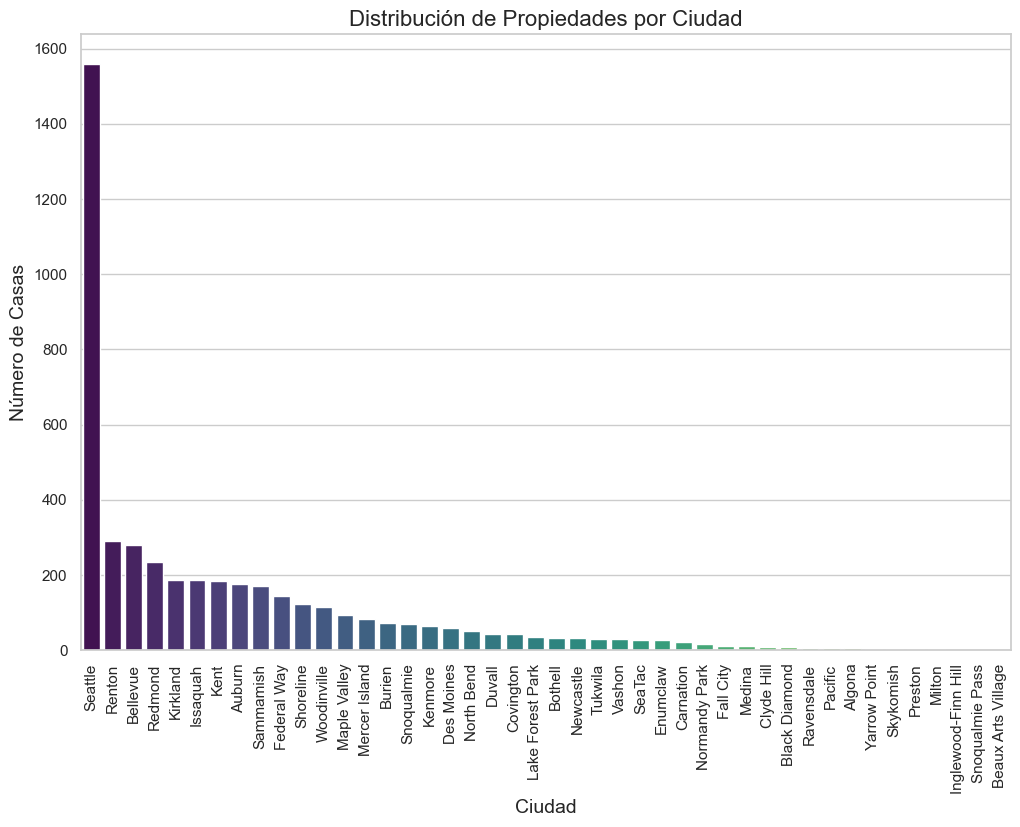

In [14]:
# Gráfico de barras para la distribución de las casas según la ciudad
plt.figure(figsize=(12, 8))
city_counts = df_cleaned['city'].value_counts()
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Ciudad', fontsize=14)
plt.ylabel('Número de Casas', fontsize=14)
plt.title('Distribución de Propiedades por Ciudad', fontsize=16)
plt.show()

Podemos ver que en su mayoria las propiedades son de Seattle y despues se van distribuyendo en otras localidades del estado de Washintong. Ahora que exploramos los datos y tenemos una mejor comprensión de los mismos, puedo continuar con la creación de los diferentes modelos de machine learning para la predicción de los precios.

# Modelos de Machine Learing

Voy a realizar 5 modelos diferentes para la predición de los precios:
- Regresión Lineal
- Árbol de Decisiones
- Bosque Aleatorio (Random Forest)
- XGBoost
- CatBoost



Antes de comenzar hacer los modelos voy a eliminar las columnas `date` y `country` que no me sirven para en análisis que quiero realizar. Despues voy a codificar las columnas categoricas como `city`, `statezip` y `street` con el metodo de One-Hot Encoding, para que los modelos como de regresión lineal, bosque aletorio y el árbol de decisiones no tenga problema con estas columnas. Luego voy a dividir el Dataframe en la variable independiente que me interesa calcular (`price`) y las variables dependientes que son el resto y por último crear los conjuntos de prueba y entrenamiento.

### Eliminación de las columnas date y country

In [15]:
# Eliminar las columnas 'date', 'country' y 'street' del DataFrame
df_cleaned.drop(columns=['date', 'country', 'street'], inplace=True)

### Codificación con metodo One-Hot

In [16]:
# Identificar las columnas categóricas que necesitan ser codificadas
categorical_cols = ['city', 'statezip']

# Aplicar One-Hot Encoding a las columnas categóricas
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

### División del DataFrame en variable objetivo, conjunto de entrenamiento y prueba

In [17]:
# Dividir el DataFrame en características (X) y variable objetivo (y)
X = df_encoded.drop(columns=['price'])  # Características: todas las columnas excepto 'price'
y = df_encoded['price']  # Variable objetivo: 'price'

# División en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

## Regresión Lineal sin estandarizar

In [18]:
model_lr_no_scaling = LinearRegression()
model_lr_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_lr_no_scaling.predict(X_test)

mse_no_scaling = mean_squared_error(y_test, y_pred_no_scaling)
r2_no_scaling = r2_score(y_test, y_pred_no_scaling)

## Regresión Lineal Estandarizada

In [19]:
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

model_lr_standard = LinearRegression()
model_lr_standard.fit(X_train_standard, y_train)
y_pred_standard = model_lr_standard.predict(X_test_standard)

mse_standard = mean_squared_error(y_test, y_pred_standard)
r2_standard = r2_score(y_test, y_pred_standard)

## Regresión Lineal con MaxAbsScaler

In [20]:
scaler_maxabs = MaxAbsScaler()
X_train_maxabs = scaler_maxabs.fit_transform(X_train)
X_test_maxabs = scaler_maxabs.transform(X_test)

model_lr_maxabs = LinearRegression()
model_lr_maxabs.fit(X_train_maxabs, y_train)
y_pred_maxabs = model_lr_maxabs.predict(X_test_maxabs)

mse_maxabs = mean_squared_error(y_test, y_pred_maxabs)
r2_maxabs = r2_score(y_test, y_pred_maxabs)

##  Regresión Lineal con MinMaxScaler

In [21]:
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

model_lr_minmax = LinearRegression()
model_lr_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = model_lr_minmax.predict(X_test_minmax)

mse_minmax = mean_squared_error(y_test, y_pred_minmax)
r2_minmax = r2_score(y_test, y_pred_minmax)

## Resultados

In [22]:
# Mostrar los resultados
print(f"Regresión Lineal sin estandarizar:")
print(f"Error cuadrático medio (MSE): {mse_no_scaling:.2f}")
print(f"Coeficiente de determinación (R^2): {r2_no_scaling:.2f}")
print()
print(f"Regresión Lineal con estandarización:")
print(f"Error cuadrático medio (MSE): {mse_standard:.2f}")
print(f"Coeficiente de determinación (R^2): {r2_standard:.2f}")
print()
print(f"Regresión Lineal con MaxAbsScaler:")
print(f"Error cuadrático medio (MSE): {mse_maxabs:.2f}")
print(f"Coeficiente de determinación (R^2): {r2_maxabs:.2f}")
print()
print(f"Regresión Lineal con MinMaxScaler:")
print(f"Error cuadrático medio (MSE): {mse_minmax:.2f}")
print(f"Coeficiente de determinación (R^2): {r2_minmax:.2f}")
print()

Regresión Lineal sin estandarizar:
Error cuadrático medio (MSE): 40496027937.26
Coeficiente de determinación (R^2): 0.67

Regresión Lineal con estandarización:
Error cuadrático medio (MSE): 42704734017.63
Coeficiente de determinación (R^2): 0.65

Regresión Lineal con MaxAbsScaler:
Error cuadrático medio (MSE): 40504982718.86
Coeficiente de determinación (R^2): 0.67

Regresión Lineal con MinMaxScaler:
Error cuadrático medio (MSE): 40540633630.77
Coeficiente de determinación (R^2): 0.67



## Conclusiónes

- Todos los resultados muestran que el rendimiento de los modelos es muy similar independientemente de si se utiliza escalado o no.
- El modelo sin escalar tiene un rendimiento ligeramente mejor en términos de MSE y R² en comparación con el modelo estandarizado con StandardScaler.
- Los modelos escalados con MaxAbsScaler y MinMaxScaler tienen un rendimiento casi idéntico al modelo sin escalar, indicando que el escalado de las características no tiene un impacto significativo en el rendimiento del modelo de regresión lineal para este conjunto de datos.

Dado que el escalado no mejora significativamente el rendimiento, se podría optar por el modelo sin escalar para simplicidad, a menos que haya otras razones. En resumen, el modelo de regresión lineal sin escalar proporciona un buen balance entre simplicidad y rendimiento para este conjunto de datos, y los métodos de escalado evaluados no ofrecen mejoras sustanciales.